In [33]:
# Open a file
f = open('../data/LAssomoir_fr.txt', 'r')

# Fill it all in the same string
text = ''
for l in f:
    text += l.strip().replace('\xa0',' ')

In [34]:
len(text)

114548

In [42]:
# Get the sentences separated by ., ..., ?, ! # To be checked!
sentences = []
for sdot in text.split('.'):
    for s3dots in sdot.split('...'):
        for sqm in s3dots.split('?'):
            for sem in sqm.split('!'):
                sentences.append(sem.strip())

In [43]:
len(sentences)

1355

In [45]:
# number of words per sentences
words = [s.split(' ') for s in sentences]
Nwords = [len(w) for w in words]

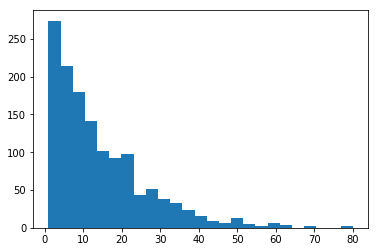

In [53]:
import matplotlib.pyplot as plt
plt.hist(Nwords, bins=25);

In [70]:
alphabet = [chr(i) for i in range(ord('a'),ord('z')+1)]

all_letters = text.replace(' ', '').replace('...', '').replace('?', '').replace('!', '').replace(';','')
Nletters = len(all_letters)

frequency = []
for l in alphabet:
    frequency.append(all_letters.count(l)+/Nletters)

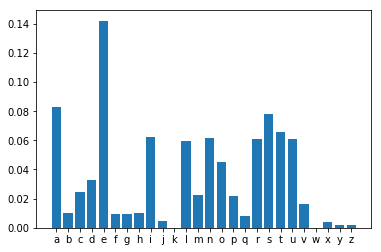

In [71]:
plt.bar(x=alphabet, height=frequency);